Libraries to use

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

empty datafram and concating all files in one file

load sales.csv 

remove null value,useless thing from dataframe

convert order id column into int 

In [145]:
df= pd.read_csv(r'sales.csv')



analysis of datset(sales)

1.what was the best month for sale? how much was earned that month..

i have to create new column of total sale

In [146]:
df.head()
df['sale']= df['Quantity Ordered'] * df['Price Each']
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale
0,248151,AA Batteries (4-pack),4,3.84,9/17/2019 14:44,"380 North St, Los Angeles, CA 90001",15.36
1,248152,USB-C Charging Cable,2,11.95,9/29/2019 10:19,"511 8th St, Austin, TX 73301",23.90
2,248153,USB-C Charging Cable,1,11.95,9/16/2019 17:48,"151 Johnson St, Los Angeles, CA 90001",11.95
3,248154,27in FHD Monitor,1,149.99,9/27/2019 7:52,"355 Hickory St, Seattle, WA 98101",149.99
4,248155,USB-C Charging Cable,1,11.95,9/1/2019 19:03,"125 5th St, Atlanta, GA 30301",11.95


extract month name from order date column

In [147]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   sale              185950 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.9+ MB


convert order date column into datetime and extract month name from date time column

In [148]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['month_name']= df['Order Date'].dt.month_name()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month_name
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,September
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,September
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,September
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,September
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,September


In [149]:
edf=df.groupby('month_name').agg(
    total_sale=('sale','sum')
)
edf

,total_sale
month_name,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73
July,2647775.76
June,2577802.26
March,2807100.38
May,3152606.75


In [150]:
edf=edf.sort_values(by='total_sale',ascending=False)
edf=edf.reset_index()
edf.shape

(12, 2)

Best month for sale: December

total sale value in December:4613443.34

visualization of this dataframe with the help of bar plot....

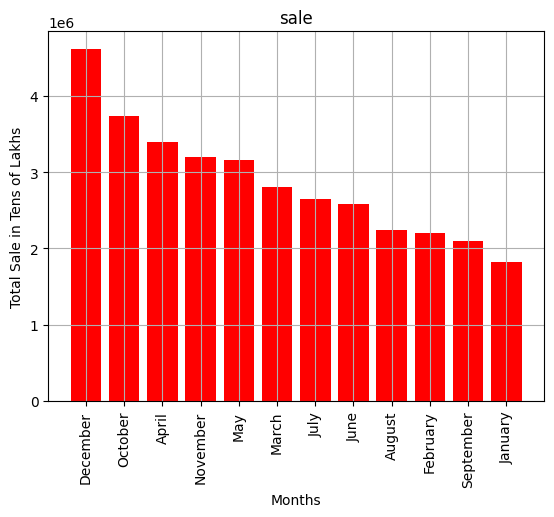

In [151]:
plt.bar(edf['month_name'],edf['total_sale'],color='red')
plt.title('sale')
plt.xlabel('Months')
plt.ylabel('Total Sale in Tens of Lakhs')
plt.grid()
plt.xticks(rotation=90,fontsize=10)
plt.show()

with seaborn same data visualization 

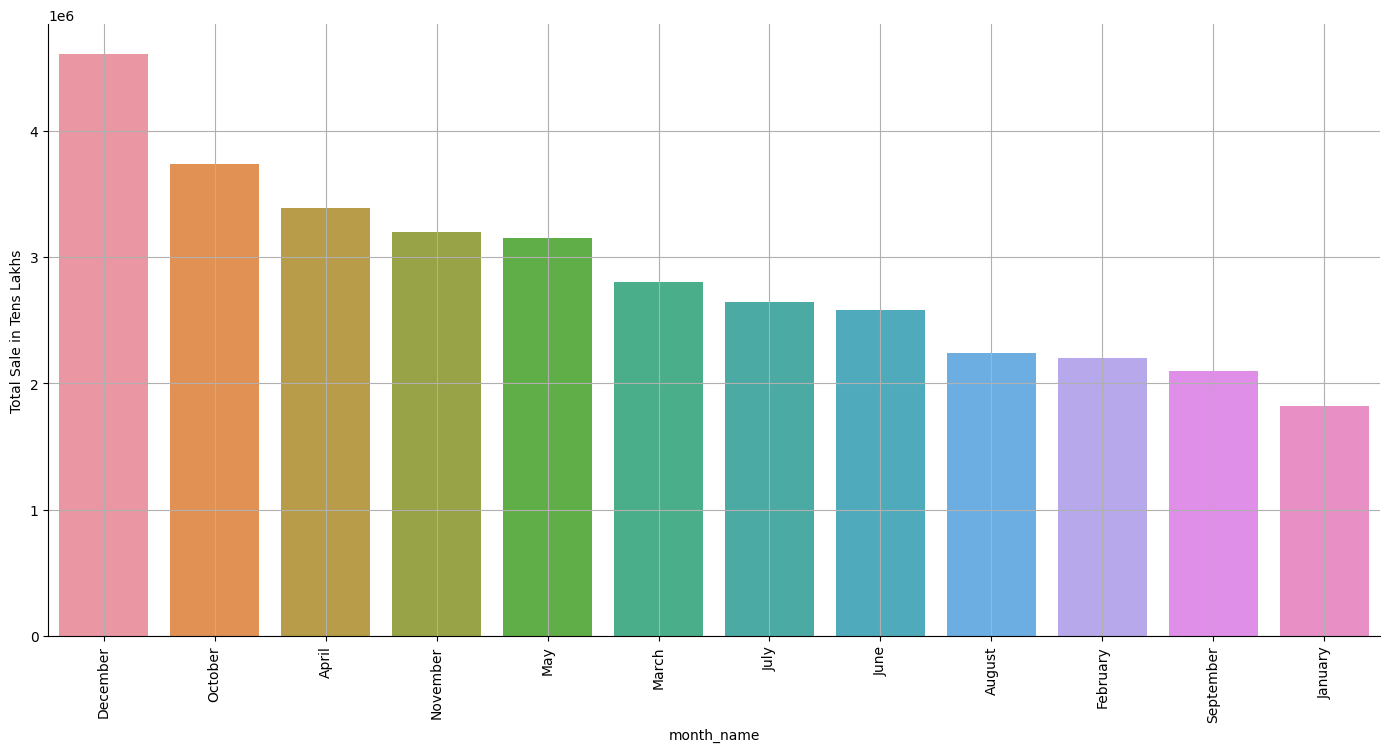

In [152]:
sns.catplot(data=edf,x= 'month_name',y= 'total_sale',kind='bar',height=7,aspect=2)
plt.xticks(rotation=90)
plt.ylabel('Total Sale in Tens Lakhs')
plt.grid()
plt.savefig('Total sale by month .png')

2.which city sold the most product? 

In [153]:
df.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month_name
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,September
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,September


extract city from purchase address column

In [154]:
ndf=df['Purchase Address'].str.split(',',expand=True)
df['City']=ndf[1]
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month_name,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,September,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,September,Austin


In [155]:
pdf=df.groupby('City').agg(
    product_Quantity=('Quantity Ordered','sum'))
pdf= pdf.reset_index()
pdf=pdf.sort_values(by='product_Quantity',ascending=False)
pdf

,City,product_Quantity
7,San Francisco,50239
4,Los Angeles,33289
5,New York City,27932
2,Boston,22528
3,Dallas,16730
0,Atlanta,16602
8,Seattle,16553
6,Portland,14053
1,Austin,11153


In [156]:
sdf= pdf.reset_index(drop=True)

sdf

,City,product_Quantity
0,San Francisco,50239
1,Los Angeles,33289
2,New York City,27932
3,Boston,22528
4,Dallas,16730
5,Atlanta,16602
6,Seattle,16553
7,Portland,14053
8,Austin,11153


Most product sold by this city:San Francisco(50239)

plot the data

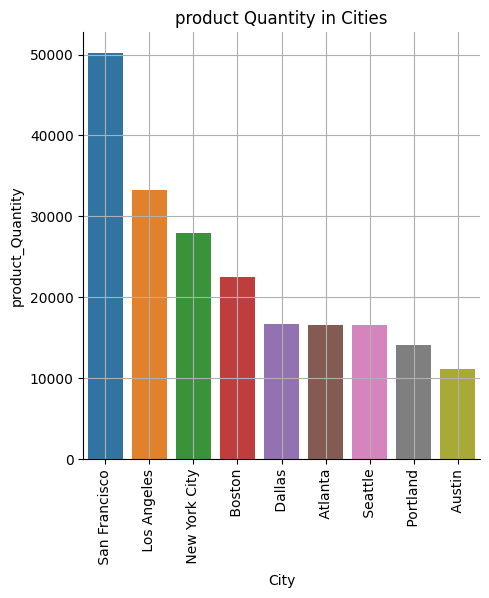

In [157]:
sns.catplot(data = sdf,x='City',y='product_Quantity',kind='bar')
plt.grid()
plt.title('product Quantity in Cities')
plt.xticks(rotation=90)
plt.savefig('most product sold by these cities.png')


What time should we display advertisement to maximize the liklihood
of customer's buying product?

Extract hour from order date column ....

In [158]:
df['Hour']= df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,month_name,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,September,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,September,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,September,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,September,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,September,Atlanta,19


In [159]:
sdf=df.groupby('Hour')['sale'].sum()
sdf=sdf.reset_index()
sdf = sdf.sort_values(by='Hour')
sdf

,Hour,sale
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


visualize

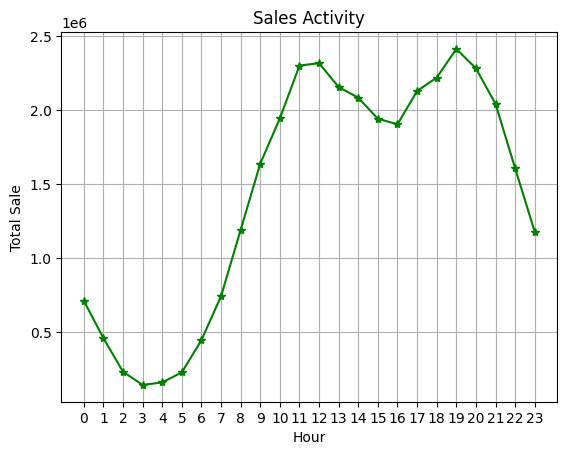

In [160]:
plt.plot(sdf['Hour'],sdf['sale'],color='green',marker='*')
plt.title('Sales Activity')
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Total Sale')
plt.xticks(np.arange(0,24))

plt.savefig('Timing of the buying product.png')

another plot for sales activity in hours

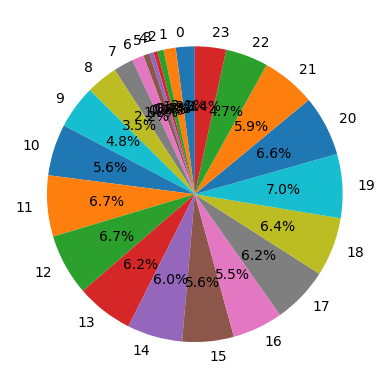

<Figure size 10000x40000 with 0 Axes>

In [161]:

plt.pie(sdf['sale'],labels=sdf['Hour'],autopct='%1.1f%%',startangle=90)
plt.figure(figsize=(100,400))
plt.show()


in this pie plot we can say most of the people buy the product at 11 AM to 8 PM .

***Which product sold the most? 

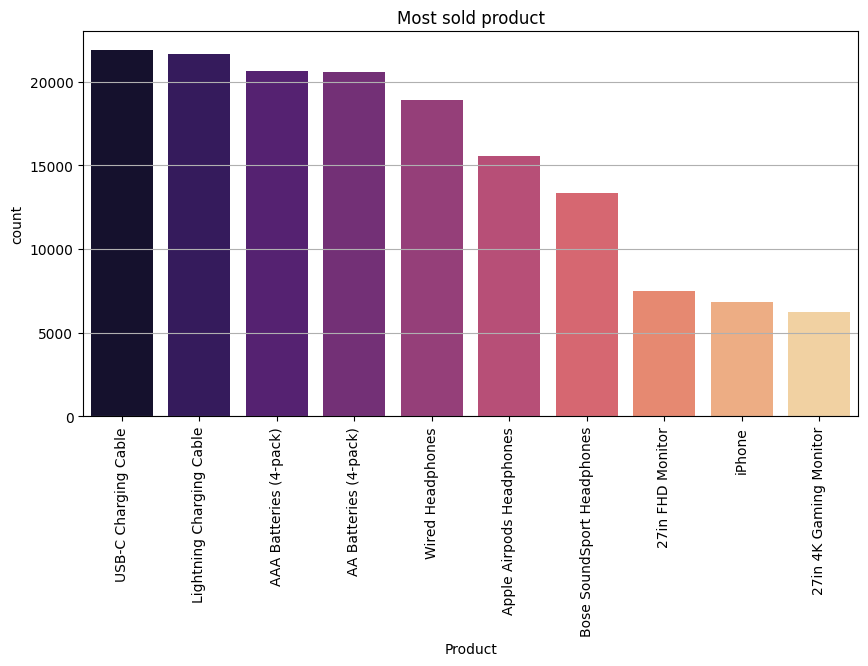

In [162]:
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90,fontsize=10)
plt.title('Most sold product')
plt.grid()
sns.countplot(data=df,x= 'Product',order=df['Product'].value_counts().index[:10],palette='magma')
plt.savefig('Most sold product.png')

Most sold product :USB-C Charging cable

which product are most often sold together?

In [163]:
ndf= df.loc[df['Order ID'].duplicated(keep=False)]
ndf.to_csv('duplicate.csv')

In [164]:
df= pd.read_csv('duplicate.csv')
df['grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df[['Order ID','grouped']]

,Order ID,grouped
0,248171,"USB-C Charging Cable,USB-C Charging Cable"
1,248171,"USB-C Charging Cable,USB-C Charging Cable"
2,248210,"iPhone,Lightning Charging Cable"
3,248210,"iPhone,Lightning Charging Cable"
4,248219,"Bose SoundSport Headphones,Google Phone"
...,...,...
14644,194050,"AA Batteries (4-pack),USB-C Charging Cable"
14645,194056,"iPhone,Lightning Charging Cable"
14646,194056,"iPhone,Lightning Charging Cable"
14647,194061,"iPhone,Lightning Charging Cable"


In [165]:
df=df.drop_duplicates(subset='Order ID')
df.to_csv('duplicate.csv',index=False)

In [166]:
from itertools import combinations
from collections import Counter

In [167]:
df = pd.read_csv('duplicate.csv')
count= Counter()
for sublist in df['grouped']:
    sublist= sublist.split(',')
    count.update(Counter(combinations(sublist,2)))
count





Counter({('USB-C Charging Cable', 'USB-C Charging Cable'): 48,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Bose SoundSport Headphones', 'Google Phone'): 8,
         ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Vareebadd Phone', 'Wired Headphones'): 143,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
         ('Bose SoundSport Headphones', '34in Ultrawide Monitor'): 11,
         ('Apple Airpods Headphones', 'Lightning Charging Cable'): 35,
         ('27in 4K Gaming Monitor', 'AA Batteries (4-pack)'): 12,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('Lightning Charging Cable', 'Bose SoundSport Headphones'): 39,
         ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
         ('AA Batteries (4-pack)', 'AA Batteries (4-pack)'): 35,
         ('Lightning Charging Cable', '27in

In [168]:
count = count.most_common()
count=dict(count)
for i in count.items():
    print(i)


(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)
(('Lightning Charging Cable', 'Apple Airpods Headphones'), 81)
(('Vareebadd Phone', 'Bose SoundSport Headphones'), 80)
(('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77)
(('Apple Airpods Headphones', 'Wired Headphones'), 69)
(('Lightning Charging Cable', 'USB-C Charging Cable'), 58)
(('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55)
(('Lightning Charging Cable', 'Lightning Charging Cable'), 54)
(('Bose SoundSport Headphones', 'Wired Headphones'), 53)
(('AA Batteries (4-pack)', 'Lightning Chargi